In [1]:
#Understanding Cost Function/Error/Loss Fucntion:-

<img align="left" src="./images/C1_W1_Lab02_GoalOfRegression.PNG"    style=" width:380px; padding: 10px;  " />


Your goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

In the previous lab, you determined that $b=100$ provided an optimal solution so let's set $b$ to 100 and focus on $w$.


In [15]:
#import the necessary libraries:-
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

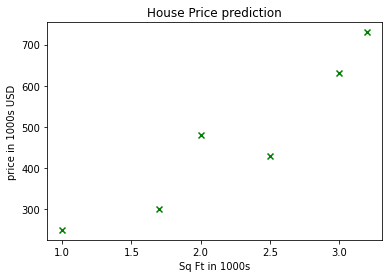

In [5]:
#Dataset:-
x_train = np.array( [1.0, 1.7, 2.0, 2.5, 3.0, 3.2] )
y_train = np.array( [250, 300, 480,  430,   630, 730] )

#training examples:-
m = x_train.shape[0]

#Plotting the data:-
plt.scatter( x_train, y_train, marker = 'x', color = 'green')
plt.title("House Price prediction")
plt.xlabel("Sq Ft in 1000s")
plt.ylabel("price in 1000s USD")
plt.show()

In [22]:
def compute_model_cost( x, y, w, b):
    f_wb = np.zeros(m)
    cost = 0
    for i in range(m):
        f_wb[i] = w*x[i] + b #Model Function
        cost = cost + (f_wb - y[i])**2 #Error/Cost Equation.
    total_cost = cost/(2*m)
    return total_cost

In [20]:
#In Oder to optimize the cost function - Apply gradient descent algorithm :-
def compute_gradient( x, y, w, b ):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0


    for i in range(m):
        f_wb = w*x[i] + b

        dj_dw_i = ( f_wb - y[i])*x[i]
        dj_db_i = (f_wb - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

In [26]:
def gradient_descent( x, y, w_in, b_in, alpha, num_of_iterations, compute_model_cost, compute_gradient ):
    m = x.shape[0]
    w = copy.deepcopy(w_in)

    J_hist = []
    param_hist = []

    b = b_in
    w = w_in

    for i in range(num_of_iterations):

        dj_dw, dj_db = compute_gradient( x, y, w, b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i < 1000000:
            J_hist.append( compute_model_cost( x, y, w, b) )
            param_hist.append( [w,b] )
       
    return w, b, J_hist, param_hist

In [27]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_model_cost, compute_gradient )
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (210.3355,  0.0000)


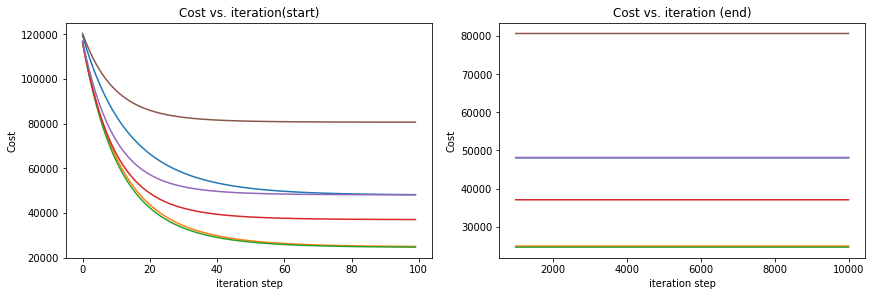

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()